In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# @hidden_cell

# This connection object is used to access your data and contains your credentials or project token.
# You might want to remove those credentials before you share your notebook.


import os, ibm_db, ibm_db_dbi as dbi, pandas as pd

Db2_ar_dsn = 'DATABASE={};HOSTNAME={};PORT={};PROTOCOL=TCPIP;UID={uid};PWD={pwd};SECURITY=SSL'.format(
    'BLUDB',
    'dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net',
    50001,
    uid='hvn40977',
    pwd="""b0hmszx3gj8h1m+w"""
)

Db2_ar_connection = dbi.connect(Db2_ar_dsn)
   
query = 'SELECT * FROM "HVN40977"."FILM"'

film = pd.read_sql_query(query, con=Db2_ar_connection)
film.head()

# After use, close the database connection with the following code:
# Db2_ar_connection.close()


,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58,{Behind the Scenes},'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [3]:

query = 'SELECT * FROM "HVN40977"."FILM_ACTOR"'

film_actor = pd.read_sql_query(query, con=Db2_ar_connection)
film_actor.head()

# After use, close the database connection with the following code:
# Db2_ar_connection.close()


,actor_id,film_id,last_update
0,1,1,2006-02-15 10:05:03
1,1,23,2006-02-15 10:05:03
2,1,25,2006-02-15 10:05:03
3,1,106,2006-02-15 10:05:03
4,1,140,2006-02-15 10:05:03


In [4]:

query = 'SELECT * FROM "HVN40977"."ACTOR"'

actor = pd.read_sql_query(query, con=Db2_ar_connection)
actor.head()

# After use, close the database connection with the following code:
# Db2_ar_connection.close()


,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620


In [5]:
df = pd.merge(film_actor, actor, left_on='actor_id', right_on='actor_id')
df.head()

,actor_id,film_id,last_update_x,first_name,last_name,last_update_y
0,1,1,2006-02-15 10:05:03,Penelope,Guiness,2013-05-26 14:47:57.620
1,1,23,2006-02-15 10:05:03,Penelope,Guiness,2013-05-26 14:47:57.620
2,1,25,2006-02-15 10:05:03,Penelope,Guiness,2013-05-26 14:47:57.620
3,1,106,2006-02-15 10:05:03,Penelope,Guiness,2013-05-26 14:47:57.620
4,1,140,2006-02-15 10:05:03,Penelope,Guiness,2013-05-26 14:47:57.620


In [6]:
df = pd.merge(df, film, left_on='film_id', right_on='film_id')
df.head()

,actor_id,film_id,last_update_x,first_name,last_name,last_update_y,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,1,1,2006-02-15 10:05:03,Penelope,Guiness,2013-05-26 14:47:57.620,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
1,10,1,2006-02-15 10:05:03,Christian,Gable,2013-05-26 14:47:57.620,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
2,20,1,2006-02-15 10:05:03,Lucille,Tracy,2013-05-26 14:47:57.620,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
3,30,1,2006-02-15 10:05:03,Sandra,Peck,2013-05-26 14:47:57.620,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
4,40,1,2006-02-15 10:05:03,Johnny,Cage,2013-05-26 14:47:57.620,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [7]:
df.drop(['last_update_x','last_update_y','last_update'], axis=1, inplace=True)
df.head()

,actor_id,film_id,first_name,last_name,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext
0,1,1,Penelope,Guiness,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
1,10,1,Christian,Gable,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
2,20,1,Lucille,Tracy,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
3,30,1,Sandra,Peck,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
4,40,1,Johnny,Cage,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [8]:
films_per_actor = df.groupby('actor_id').agg({'film_id': lambda num: len(num)}).reset_index()
films_per_actor = pd.merge(films_per_actor, actor, left_on='actor_id', right_on='actor_id')
films_per_actor.drop('last_update', axis=1, inplace=True)
films_per_actor = films_per_actor[['actor_id','first_name','last_name','film_id']]
films_per_actor.columns = ['actor_id','first_name','last_name','number_of_films']
films_per_actor.head()

,actor_id,first_name,last_name,number_of_films
0,1,Penelope,Guiness,19
1,2,Nick,Wahlberg,25
2,3,Ed,Chase,22
3,4,Jennifer,Davis,22
4,5,Johnny,Lollobrigida,29


In [9]:
top_actors = films_per_actor.sort_values('number_of_films', ascending=False).reset_index().head(10)
top_actors

,index,actor_id,first_name,last_name,number_of_films
0,106,107,Gina,Degeneres,42
1,101,102,Walter,Torn,41
2,197,198,Mary,Keitel,40
3,180,181,Matthew,Carrey,39
4,22,23,Sandra,Kilmer,37
5,80,81,Scarlett,Damon,36
6,12,13,Uma,Wood,35
7,105,106,Groucho,Dunst,35
8,36,37,Val,Bolger,35
9,59,60,Henry,Berry,35


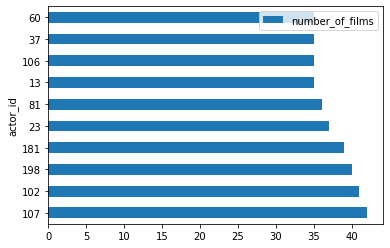

In [10]:
top_actors.plot(x='actor_id',y='number_of_films',kind='barh')

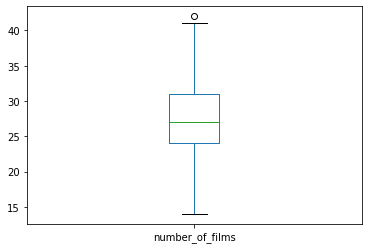

In [11]:
films_per_actor.plot(y='number_of_films',kind='box')

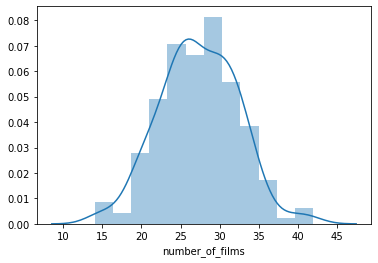

In [12]:
sns.distplot(films_per_actor['number_of_films'])

In [13]:
actors_per_film = df.groupby('film_id').agg({'actor_id': lambda num: len(num)}).reset_index()
actors_per_film = pd.merge(actors_per_film, film, left_on='film_id', right_on='film_id')
actors_per_film = actors_per_film[['film_id','actor_id','title','release_year','rating']]
actors_per_film.columns = ['film_id','number_of_actors','title','release_year','rating']
actors_per_film.head()

,film_id,number_of_actors,title,release_year,rating
0,1,10,Academy Dinosaur,2006,PG
1,2,4,Ace Goldfinger,2006,G
2,3,5,Adaptation Holes,2006,NC-17
3,4,5,Affair Prejudice,2006,G
4,5,5,African Egg,2006,G


In [39]:
actors_per_film['number_of_actors'].describe()

count    997.000000
mean       5.478435
std        2.321712
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       15.000000
Name: number_of_actors, dtype: float64

In [14]:
most_actors = actors_per_film.sort_values('number_of_actors', ascending=False).reset_index().head(10)
most_actors

,index,film_id,number_of_actors,title,release_year,rating
0,505,508,15,Lambs Cincinatti,2006,PG-13
1,187,188,13,Crazy Home,2006,PG
2,711,714,13,Random Go,2006,NC-17
3,86,87,13,Boondock Ballroom,2006,NC-17
4,145,146,13,Chitty Lock,2006,G
5,603,606,13,Mummy Creatures,2006,NC-17
6,248,249,13,Dracula Crystal,2006,G
7,411,414,12,Hellfighters Sierra,2006,PG
8,514,517,12,Lesson Cleopatra,2006,NC-17
9,526,529,12,Lonely Elephant,2006,G


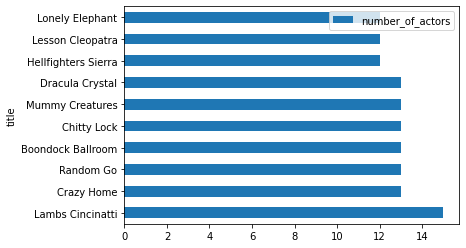

In [15]:
most_actors.plot(x='title',y='number_of_actors',kind='barh')

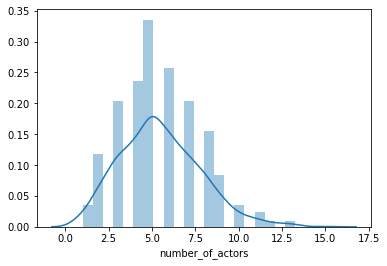

In [16]:
sns.distplot(actors_per_film['number_of_actors'])

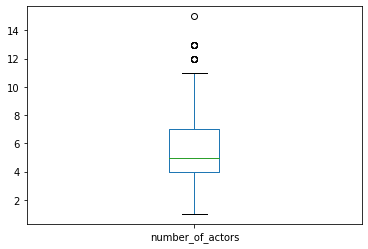

In [17]:
actors_per_film.plot(y='number_of_actors',kind='box')

In [19]:
film.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58,{Behind the Scenes},'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [24]:
ratings = pd.DataFrame(film.groupby('rating')['film_id'].count().reset_index())
ratings

,rating,film_id
0,G,178
1,NC-17,210
2,PG,194
3,PG-13,223
4,R,195


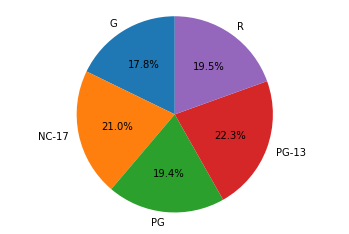

In [30]:
fig1, ax1 = plt.subplots()
ax1.pie(ratings['film_id'], labels=ratings['rating'], autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

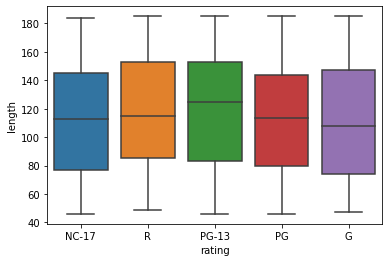

In [37]:
#film.plot(x='rating',y='length',kind='box')
sns.boxplot(film['rating'], film['length'])